## Should We Trust that Hiking Trail Rating?

## Contributors:
- Ahmed Al Ayoubi
- Chris Kirchberg
- Harlan Kefalas

## Motivation and Dataset:
When looking for hikes, sometimes the rating and difficulty specified at websites do not always seem to meet expectations of those who hike the trail of interest. Which factors have an impact on the rating?

Taking a look a various websites, we settled on using https://www.hikingproject.com to scrape information from hikes in the state of Colorado. Currently the site lists 5,855 trails in that state which are curated by staff or contributors. Other sites like www.alltrails.com look like they would be good sites but have web scraping prevention tools in place which makes it difficult to extract information.

## Task Definition/Research Question:
As a prospective hiker of a trail, questions come to mind before choosing that trail to hike:

- Does the ratings/difficulty stated by the reviewers match that of the currated trail?
- Is there other information about the trail that might give us a better idea as what the trail should be rated?
- Is there information that might corroborate the trails difficulty/rating either by the curator or the reviewers?

Answers to these questions could possibly be gleaned by scraping data from website like https://www.hikingproject.com, cleaned and then explored by visualizations and simple summary statistics. This project seeks out to explore some possible answers and directions to these questions.



## Literature Review:
Upon searching the web for similar types of tasks, APIs, or others who have attempted something similar, we ran accross this GitHub page: https://github.com/oschow/take-a-hike

It used packages like Selenium, MongoDB, Pandas, sklearn and other resources to scrape infromation from www.alltrails.com, model, visualize and create a Hike Recommendation web app to find hikes that are similar to the hikers interests or whims.

This seemed like a good start to try our hand at exploring ratings...until we ran into blocks in web scrapping AllTrails.com...and so our journey began.

## Data Scraping 
Web scraping https://www.hikingproject.com from hiking trails in the state of Colorado. as stated above, 5,855 trails are listed and curated by staff or contributors. Using the Selenium automation test tool, we scraped 4,903 hiking trails in Colorado filtered by the following Data attributes:  
  
- Trail Name
- Trail Length 
- Trail Difficulty
- Trail Rating
- User Rate Number
- Trail Type
- Elev_Up
- Elev_Down 
- Highest Elevation
- Lowest Elevation
- Average Grade
- Max Grade
- Dogs and Features
- Stats Info

First, we import the required modules.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.action_chains import ActionChains
from IPython.display import display, HTML
from random import randint
from time import sleep

Now we open the driver to the page with all the trails in Colorado. Each state, or area, has a set URL.

In [15]:
# open a web browser
driver = webdriver.Chrome()

# navigate to the page
driver.get('https://www.hikingproject.com/directory/8007418/colorado')

# locate the "Load More" button
load_more_button = driver.find_element(By.XPATH, "//button[@id='load-more-trails']")


After scrolling down past the 'Gems' and 'Recommended Trails', trails that are highly rated, we find the list of all trails in Colorado. Initially, only 10 trails are listed, but we want all the trails. So, we identify the load more button and create a loop to continue pressing it until all the trails are listed. The sleep timer ensures that we provide enough time for the new trails to load. Then we iterate all the hike identification numbers and extract the links to their pages. This is a time intensive step.

In [9]:
try:
    while load_more_button.is_displayed():
        load_more_button.click()
        sleep(randint(1,5))
except StaleElementReferenceException:
    print('Completed')

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=110.0.5481.177)


In [10]:

# locate the elements that contain the hike name and region
hike_ids = driver.find_elements(By.XPATH, "//table[@class='table table-striped trail-table']//tr/td/a") 
 
# Create alist for all the trail pages 
links = []

# iterate through the list of elements and extract the hike information
for j in range(len(hike_ids)):
    hike_link = hike_ids[j].get_attribute("href")
    links.append(hike_link)

For each trail page, we extract the attributes we want to analyze and close the browser. Time intensive step.

In [16]:
    # locate the elements that contain the 'Trail Name','Trail Length','Trail Difficulty', 'Trail Rating', 'User Rate Number' 'Trail Type', 'Elev_Up', 'Elev_Down', 'Highest Elevation', 'Lowest Elevation', 'Average Grade', 'Max Grade', 'Dogs and Features'
hike_list =[]
links_backup = cpy_list = copy.deepcopy(links) # creates a copy of the links list
num_visit = 0
for link in links:
        driver.get(link)
        
        hike_name = driver.find_element(By.ID, "trail-title")
        
        hike_difficulty = [d.text for d in driver.find_elements(By.CLASS_NAME, 'trail-subheader')]
        
        hike_rating = [r.text for r in driver.find_elements(By.CSS_SELECTOR, '#title-stars > span.small')]
        
        no_userRate = [r.text for r in driver.find_elements(By.CSS_SELECTOR, '#title-stars > span.small')]
        
        dog_feature = [d.text for d in driver.find_elements(By.CSS_SELECTOR, '#trail-text > div:nth-child(2) > h3 > span')]
        
        stats = driver.find_elements(By.CLASS_NAME, 'stat-box')
        
        elev_up= driver.find_element(By.CSS_SELECTOR, "#trail-stats-bar > div:nth-child(3) > h3:nth-child(1) > span.imperial")
        
        elev_down= driver.find_element(By.CSS_SELECTOR, '#trail-stats-bar > div:nth-child(3) > h3:nth-child(3) > span.imperial')
        
        trail_length= driver.find_element(By.CSS_SELECTOR,'#trail-stats-bar > div.stat-block.ml-2.mr-1.mt-1 > span.imperial > h3')
        
        trail_type = driver.find_element(By.CSS_SELECTOR,'#trail-stats-bar > div.stat-block.ml-2.mr-1.mt-1 > h3')
        
        elev_high = driver.find_element(By.CSS_SELECTOR, '#trail-stats-bar > div:nth-child(2) > h3:nth-child(1) > span.imperial')
        
        elev_low = driver.find_element(By.CSS_SELECTOR, '#trail-stats-bar > div:nth-child(2) > h3:nth-child(3) > span.imperial')
        
        avg_grade = driver.find_element(By.CSS_SELECTOR, '#trail-stats-bar > div.stat-block.ml-1.mt-1 > h3:nth-child(1)')
        
        max_grade = driver.find_element(By.CSS_SELECTOR, '#trail-stats-bar > div.stat-block.ml-1.mt-1 > h3:nth-child(3)')
 
        hike_list.append([hike_name.text, trail_length.text, hike_difficulty, hike_rating, no_userRate, trail_type.text, elev_up.text, elev_down.text, elev_high.text, elev_low.text, avg_grade.text, max_grade.text, dog_feature, [stat.text for stat in stats]])
        links_backup.remove(link) # removes link from the back up so we can track which links were visited
        num_visit += 1
# close the web browser
driver.quit()

Check to make sure counts match:

In [18]:
print('Total number of links: ', len(links))
print('Total number of links visited: ', num_visit)

Total number of links:  4903


NameError: name 'num_visit' is not defined

Then we create a dataframe and remove new line and spaces before saving it to a pickle file.

In [19]:
df = pd.DataFrame(data=hike_list, columns=['Trail Name', 'Trail Length','Trail Difficulty', 'Trail Rating', 'User Rate Number', 'Trail Type', 'Elev_Up', 'Elev_Down', 'Highest Elevation', 'Lowest Elevation', 'Average Grade', 'Max Grade', 'Dogs and Features', 'Stats Info.'])
hike_df = df.replace('\n', ' ', regex=True)
hike_df.to_pickle("hike_project_2.pkl")

## Data Cleaning:
Data cleaning is identifying and correcting errors or inconsistencies in hike_project.pkl dataset to ensure that the data is accurate, complete, and consistent.

Data cleaning typically involves several tasks, such as:
- Removing duplicates
- Handling missing data
- Standardizing data
- Removing outliers
- Correcting data type
- Merging data
- Normalizing data
- Reformatting data

In [3]:
# Read the hiking dataset pickle file  
df = pd.read_pickle("hike_project_2.pkl")  
df.sample(5)

,Trail Name,Trail Length,Trail Difficulty,Trail Rating,User Rate Number,Trail Type,Elev_Up,Elev_Down,Highest Elevation,Lowest Elevation,Average Grade,Max Grade,Dogs and Features,Stats Info.
4713,Independence Bypass #9234.1A,0.9,[INTERMEDIATE\nBe the first to rate!\nAreas\nC...,[],[],Point to Point,160',37',"9,514'","9,392'",4%,14%,[Unknown],[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...
3200,Big Al Trail #630,0.5,[EASY\n 5.0 (1)\nAreas\nCO\nSouthwest Rockies\...,[ 5.0 (1)],[ 5.0 (1)],Point to Point,54',28',"8,988'","8,938'",3%,14%,[Unknown],[ 5.0 from 1 vote\n5 Star\n100%\n4 Star\n0%\n...
1287,Lake Link Trail,8.8,[INTERMEDIATE/DIFFICULT\n 3.0 (2)\nAreas\nCO\n...,[ 3.0 (2)],[ 3.0 (2)],Point to Point,346',498',"5,436'","5,231'",2%,7%,"[Leashed, Lake · Views]",[ 3.0 from 2 votes\n5 Star\n0%\n4 Star\n0%\n3...
4453,Hawxhurst Trail #2530,4.0,[DIFFICULT\nBe the first to rate!\nAreas\nCO\n...,[],[],Point to Point,"2,613'",7',"10,367'","7,760'",12%,32%,[Unknown],[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...
4521,Duck Lake Trail #2261,2.5,[EASY\nBe the first to rate!\nAreas\nCO\nCentr...,[],[],Point to Point,553',14',"9,776'","9,232'",4%,16%,[Unknown],[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...


Separate the location column to State, City, Area, and Site.

In [4]:
# adding State, City, Area and Site 
df['State'] = df['Trail Difficulty'].apply(lambda x: x[0].split('\n')[3])
df['City'] = df['Trail Difficulty'].apply(lambda x: x[0].split('\n')[4])
df['Area'] = df['Trail Difficulty'].apply(lambda x: x[0].split('\n')[5] if len(x[0].split('\n')) > 5 else np.nan)
df['Site'] = df['Trail Difficulty'].apply(lambda x: x[0].split('\n')[6] if len(x[0].split('\n')) > 6 else np.nan)

# Specify the desired order of columns
columns = df.columns.tolist()
columns.remove('State')
columns.remove('City')
columns.remove('Area')
columns.remove('Site')
columns = columns[:1] + ['State'] + ['City'] + ['Area'] + ['Site'] + columns[1:]
df = df[columns]

df.sample(5)

,Trail Name,State,City,Area,Site,Trail Length,Trail Difficulty,Trail Rating,User Rate Number,Trail Type,Elev_Up,Elev_Down,Highest Elevation,Lowest Elevation,Average Grade,Max Grade,Dogs and Features,Stats Info.
1620,Swampy Pass Trail #9439,CO,Central Rockies,Crested Butte,NaN,5.7,[INTERMEDIATE\n 5.0 (1)\nAreas\nCO\nCentral Ro...,[ 5.0 (1)],[ 5.0 (1)],Point to Point,"1,437'",278',"10,314'","9,004'",6%,24%,[Unknown],[ 5.0 from 1 vote\n5 Star\n100%\n4 Star\n0%\n...
4734,Bill Creek Trail #28,CO,Central Rockies,Grand Lake,NaN,2.7,[DIFFICULT\nBe the first to rate!\nAreas\nCO\n...,[],[],Point to Point,"1,184'",127',"10,314'","9,149'",9%,17%,[Unknown],[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...
4456,Smalley Mountain Trail #2531,CO,Western Colorado,Grand Mesa National Forest,NaN,4.6,[DIFFICULT\nBe the first to rate!\nAreas\nCO\n...,[],[],Point to Point,214',"2,244'","10,192'","8,099'",10%,23%,[Unknown],[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...
2556,Cherry Creek Trail,CO,Central Rockies,White River National Forest,Main Elk Creek,4.1,[DIFFICULT\n 4.0 (2)\nAreas\nCO\nCentral Rocki...,[ 4.0 (2)],[ 4.0 (2)],Point to Point,0',"1,974'","8,980'","7,006'",9%,30%,[Unknown],[ 4.0 from 2 votes\n5 Star\n0%\n4 Star\n100%\...
3403,Trinity Lake Route,CO,Southwest Rockies,San Juan National Forest,Weminuche Wilderness,2.8,[DIFFICULT\n 4.0 (2)\nAreas\nCO\nSouthwest Roc...,[ 4.0 (2)],[ 4.0 (2)],Point to Point,"1,696'",29',"12,208'","10,515'",12%,35%,"[Leashed, Lake · River/Creek · Views · Wildflo...",[ 4.0 from 2 votes\n5 Star\n50%\n4 Star\n0%\n...


Extracting the overall trail rating and the total number of user reviews.

In [5]:
if not np.issubdtype(df['Trail Rating'].dtype, np.dtype(str).type):
    df['Trail Rating'] = df['Trail Rating'].astype(str)
df['Overall Trail Rating'] = pd.to_numeric(df['Trail Rating'].str.extract('(\d+\.\d+)')[0], errors='coerce')
df['Total User Reviews'] = pd.to_numeric(df['Trail Rating'].str.extract('\((\d+)\)')[0], errors='coerce')
df.sample(5)

,Trail Name,State,City,Area,Site,Trail Length,Trail Difficulty,Trail Rating,User Rate Number,Trail Type,Elev_Up,Elev_Down,Highest Elevation,Lowest Elevation,Average Grade,Max Grade,Dogs and Features,Stats Info.,Overall Trail Rating,Total User Reviews
2270,Red Table Trail,CO,Central Rockies,White River National Forest,NaN,5.2,[DIFFICULT\n 5.0 (1)\nAreas\nCO\nCentral Rocki...,[' 5.0 (1)'],[ 5.0 (1)],Point to Point,"1,486'",521',"10,739'","9,537'",7%,20%,"[Unknown, Spring · Views]",[ 5.0 from 1 vote\n5 Star\n100%\n4 Star\n0%\n...,5.0,1.0
776,Long's Canyon Trail,CO,Southwest Rockies,Trinidad,Trinidad Lake State Park,0.8,[EASY\n 4.0 (1)\nAreas\nCO\nSouthwest Rockies\...,[' 4.0 (1)'],[ 4.0 (1)],Point to Point,53',30',"6,273'","6,226'",2%,4%,[Leashed],[ 4.0 from 1 vote\n5 Star\n0%\n4 Star\n100%\n...,4.0,1.0
442,Tombstone Nature Trail,CO,Northwest Rockies,Clark,Steamboat Lake State Park,1.1,[EASY/INTERMEDIATE\n 4.0 (1)\nAreas\nCO\nNorth...,[' 4.0 (1)'],[ 4.0 (1)],Loop,157',158',"8,173'","8,043'",6%,15%,"[Unknown, Lake · Views]",[ 4.0 from 1 vote\n5 Star\n0%\n4 Star\n100%\n...,4.0,1.0
2545,Cash-Money,CO,Southwest Rockies,Cortez,Phil's World,0.8,[INTERMEDIATE\n 3.0 (1)\nAreas\nCO\nSouthwest ...,[' 3.0 (1)'],[ 3.0 (1)],Lollipop,108',106',"6,430'","6,328'",5%,18%,[Unknown],[ 3.0 from 1 vote\n5 Star\n0%\n4 Star\n0%\n3 ...,3.0,1.0
911,Rattlesnake Canyon Arches Trail - R1,CO,Western Colorado,Fruita,NaN,6.1,[DIFFICULT\n 4.7 (6)\nAreas\nCO\nWestern Color...,[' 4.7 (6)'],[ 4.7 (6)],Point to Point,"1,335'",739',"5,715'","4,619'",6%,60%,"[Unknown, Cave · Views · Wildlife]",[ 4.7 from 6 votes\n5 Star\n67%\n4 Star\n33%\...,4.7,6.0


We clean the trail difficulty and map the difficulty to a number, 1 being easiest and 5 being the most difficult.

In [6]:
df['Trail Difficulty'] = df['Trail Difficulty'].apply(lambda x: x[0].split()[0])

difficulty_map = {
    'EASY': 1,
    'EASY/INTERMEDIATE': 2,
    'INTERMEDIATE': 3,
    'INTERMEDIATE/DIFFICULT': 4,
    'DIFFICULT': 5
}

# Create and sort the Difficulty Number column 
df['Difficulty Number'] = df['Trail Difficulty'].map(difficulty_map)
columns = df.columns.tolist()
columns.remove('Difficulty Number')
columns = columns[:7] + ['Difficulty Number'] + columns[7:]
df = df[columns]
df.sample(5)

,Trail Name,State,City,Area,Site,Trail Length,Trail Difficulty,Difficulty Number,Trail Rating,User Rate Number,...,Elev_Up,Elev_Down,Highest Elevation,Lowest Elevation,Average Grade,Max Grade,Dogs and Features,Stats Info.,Overall Trail Rating,Total User Reviews
1735,Bellyache Overlook,CO,Central Rockies,Edwards and Wolcott,NaN,0.8,EASY/INTERMEDIATE,2.0,[' 4.0 (1)'],[ 4.0 (1)],...,51',47',"9,637'","9,597'",2%,5%,"[Off-leash, Fall Colors · Views · Wildflowers]",[ 4.0 from 1 vote\n5 Star\n0%\n4 Star\n100%\n...,4.0,1.0
2043,Estes Cone Trail,CO,Front Range,Rocky Mountain National Park,Bear Lake,1.3,INTERMEDIATE/DIFFICULT,4.0,[' 3.9 (14)'],[ 3.9 (14)],...,"1,242'",0',"10,974'","9,731'",18%,49%,"[No Dogs, Birding · Fall Colors · Views · Wild...",[ 3.9 from 14 votes\n5 Star\n36%\n4 Star\n36%...,3.9,14.0
2415,Spring Creek Trail #2068,CO,Central Rockies,White River National Forest,NaN,6.4,INTERMEDIATE,3.0,[],[],...,"2,766'",0',"10,856'","8,091'",8%,20%,[Unknown],[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...,NaN,NaN
318,Chase Meadow Trail,CO,Front Range,Conifer,Staunton State Park,0.6,EASY,1.0,[' 3.3 (3)'],[ 3.3 (3)],...,0',183',"8,498'","8,316'",6%,10%,[Unknown],[ 3.3 from 3 votes\n5 Star\n0%\n4 Star\n33%\n...,3.3,3.0
1108,Road 3580,CO,Central Rockies,Gunnison,Hartman Rocks,1.4,EASY,1.0,[' 2.0 (1)'],[ 2.0 (1)],...,191',0',"8,466'","8,275'",3%,4%,[Unknown],[ 2.0 from 1 vote\n5 Star\n0%\n4 Star\n0%\n3 ...,2.0,1.0


Now we split the Dog and Features into separate columns and replacing empty values with NaN

In [7]:
# Cleaning Dog and Features, and sort columns 
df['Features'] = df['Dogs and Features'].apply(lambda x: x[1] if len(x) > 1 else np.nan)
df['Dogs'] = df['Dogs and Features'].str[0]
df['Dogs'] = df['Dogs'].replace(np.nan,"Unknown")
df['Dogs'] = df['Dogs'].replace("","Unknown")
columns = df.columns.tolist()
columns.remove('Features')
columns = columns[:18] + ['Features'] + columns[18:]
df = df[columns]
df.sample(5)

,Trail Name,State,City,Area,Site,Trail Length,Trail Difficulty,Difficulty Number,Trail Rating,User Rate Number,...,Highest Elevation,Lowest Elevation,Average Grade,Max Grade,Dogs and Features,Features,Stats Info.,Overall Trail Rating,Total User Reviews,Dogs
4893,Regulator,CO,Southwest Rockies,Mancos,Aqueduct Trails,1.2,EASY/INTERMEDIATE,2.0,[' 5.0 (1)'],[ 5.0 (1)],...,"7,055'","6,923'",3%,9%,[Off-leash],NaN,[ 5.0 from 1 vote\n5 Star\n100%\n4 Star\n0%\n...,5.0,1.0,Off-leash
1956,Fraser River Trail,CO,Central Rockies,Winter Park and Fraser,Winter Park/Trestle Bike Park,4.9,EASY,1.0,[' 3.2 (5)'],[ 3.2 (5)],...,"9,018'","8,584'",2%,9%,"[Leashed, Views]",Views,[ 3.2 from 5 votes\n5 Star\n0%\n4 Star\n40%\n...,3.2,5.0,Leashed
3824,Piburn Trail #8880,CO,Central Rockies,Gunnison National Forest - North,NaN,5.9,DIFFICULT,5.0,[],[],...,"10,639'","8,870'",13%,45%,[Unknown],NaN,[ 0.0 from 0 votes\n5 Star\n0%\n4 Star\n0%\n3...,NaN,NaN,Unknown
4721,Fall Creek Trail #9231,CO,Southwest Rockies,Uncompahgre National Forest,Uncompahgre Wilderness,8.8,INTERMEDIATE,3.0,[' 5.0 (1)'],[ 5.0 (1)],...,"12,743'","10,986'",7%,28%,[Unknown],NaN,[ 5.0 from 1 vote\n5 Star\n100%\n4 Star\n0%\n...,5.0,1.0,Unknown
1204,Mill Creek Trail,CO,Front Range,Fort Collins,Horsetooth Mountain Park,3.3,DIFFICULT,5.0,[' 4.2 (5)'],[ 4.2 (5)],...,"6,927'","5,602'",10%,26%,"[Leashed, Lake · River/Creek · Views · Wildflo...",Lake · River/Creek · Views · Wildflowers · Wil...,[ 4.2 from 5 votes\n5 Star\n40%\n4 Star\n40%\...,4.2,5.0,Leashed


Further splitting the features column into columns with boolean values for each possible feature.


In [8]:
# Splitting Features Contains into separate Columns
all_features = ['Birding', 'Fall Colors', 'River/Creek', 'Views', 'Wildflowers', 'Spring',
                  'Geological Significance', 'Swimming', 'Lake', 'Wildlife']
for i in all_features:
    df[i] = df['Features'].str.contains(i)

df['No Features'] = df['Features'].isnull()
# Replacing all Features NaN values with False 
df['Birding'] = df['Birding'].fillna(False)
df['Fall Colors'] = df['Fall Colors'].fillna(False)
df['River/Creek'] = df['River/Creek'].fillna(False)
df['Views'] = df['Views'].fillna(False)
df['Wildflowers'] = df['Wildflowers'].fillna(False)
df['Wildlife'] = df['Wildlife'].fillna(False)
df['Spring'] = df['Spring'].fillna(False)
df['Geological Significance'] = df['Geological Significance'].fillna(False)
df['Swimming'] = df['Swimming'].fillna(False)
df['Lake'] = df['Lake'].fillna(False)
   
df.iloc[:,18:].sample(5)

,Features,Stats Info.,Overall Trail Rating,Total User Reviews,Dogs,Birding,Fall Colors,River/Creek,Views,Wildflowers,Spring,Geological Significance,Swimming,Lake,Wildlife,No Features
4841,Historical Significance,[ 4.0 from 1 vote\n5 Star\n0%\n4 Star\n100%\n...,4.0,1.0,Leashed,False,False,False,False,False,False,False,False,False,False,False
3318,Birding · Fall Colors · River/Creek · Views · ...,[ 5.0 from 3 votes\n5 Star\n100%\n4 Star\n0%\...,5.0,3.0,Leashed,True,True,True,True,True,False,False,False,False,True,False
4816,Fall Colors · Views,[ 4.0 from 1 vote\n5 Star\n0%\n4 Star\n100%\n...,4.0,1.0,Unknown,False,True,False,True,False,False,False,False,False,False,False
1147,NaN,[ 4.0 from 1 vote\n5 Star\n0%\n4 Star\n100%\n...,4.0,1.0,Unknown,False,False,False,False,False,False,False,False,False,False,True
3194,Views · Wildflowers,[ 4.0 from 2 votes\n5 Star\n0%\n4 Star\n100%\...,4.0,2.0,Unknown,False,False,False,True,True,False,False,False,False,False,False


Drop the columns we no longer need.

In [9]:
#Dropping Stats info. and Features columns
df.drop(columns=['Stats Info.', 'Trail Rating', 'User Rate Number', 'Dogs and Features', 'Features'], inplace=True)


Now we ensure the data types are correct for each factor and convert percentages to decimals. We also remove the tick marks on elevation and percentage from the grade columns.

In [10]:
# Showing Datatypes 
df.dtypes

Trail Name                  object
State                       object
City                        object
Area                        object
Site                        object
Trail Length                object
Trail Difficulty            object
Difficulty Number          float64
Trail Type                  object
Elev_Up                     object
Elev_Down                   object
Highest Elevation           object
Lowest Elevation            object
Average Grade               object
Max Grade                   object
Overall Trail Rating       float64
Total User Reviews         float64
Dogs                        object
Birding                       bool
Fall Colors                   bool
River/Creek                   bool
Views                         bool
Wildflowers                   bool
Spring                        bool
Geological Significance       bool
Swimming                      bool
Lake                          bool
Wildlife                      bool
No Features         

In [11]:
# Correcting DataTypes and removing unnecessary characters
df['Trail Length'] = df['Trail Length'].astype(float)
df['Elev_Up'] = df['Elev_Up'].str.replace("'", "").str.replace(",", "").astype(float)
df['Elev_Down'] = df['Elev_Down'].str.replace("'", "").str.replace(",", "").astype(float)
df['Highest Elevation'] = df['Highest Elevation'].str.replace("'", "").str.replace(",", "").astype(float)
df['Lowest Elevation'] = df['Lowest Elevation'].str.replace("'", "").str.replace(",", "").astype(float)
df['Average Grade'] = df['Average Grade'].str.strip('%').astype(float) / 100
df['Max Grade'] = df['Max Grade'].str.strip('%').astype(float) / 100

df.dtypes

Trail Name                  object
State                       object
City                        object
Area                        object
Site                        object
Trail Length               float64
Trail Difficulty            object
Difficulty Number          float64
Trail Type                  object
Elev_Up                    float64
Elev_Down                  float64
Highest Elevation          float64
Lowest Elevation           float64
Average Grade              float64
Max Grade                  float64
Overall Trail Rating       float64
Total User Reviews         float64
Dogs                        object
Birding                       bool
Fall Colors                   bool
River/Creek                   bool
Views                         bool
Wildflowers                   bool
Spring                        bool
Geological Significance       bool
Swimming                      bool
Lake                          bool
Wildlife                      bool
No Features         

Our final step is to save the cleaned dataframe to a pickle file.

In [12]:
# Saving a copy of the DataFrame
df.to_pickle("hike_project_cleaned.pkl")

## Visualizations:
Insert types of visualizaitons and why. What can we get out of it. Distributions on each feature/variable. Plot of difficulty vs. user entered difficulty. Plotting different variables/features vs. average rating. Save more difficulty level. Distribution of ratings (use a heatmap and cluster using Seaborn). Try multple regression of features to see what might impact rating the most (not a predicite model, but a descriptive model).

In [5]:
df = pd.read_pickle("hike_project_cleaned.pkl")  
df.info()
display(df.describe())
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4903 entries, 0 to 4902
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Trail Name               4903 non-null   object 
 1   State                    4903 non-null   object 
 2   City                     4903 non-null   object 
 3   Area                     4838 non-null   object 
 4   Site                     2538 non-null   object 
 5   Trail Length             4903 non-null   float64
 6   Trail Difficulty         4903 non-null   object 
 7   Difficulty Number        4844 non-null   float64
 8   Trail Type               4903 non-null   object 
 9   Elev_Up                  4903 non-null   float64
 10  Elev_Down                4903 non-null   float64
 11  Highest Elevation        4903 non-null   float64
 12  Lowest Elevation         4903 non-null   float64
 13  Average Grade            4903 non-null   float64
 14  Max Grade               

,Trail Length,Difficulty Number,Elev_Up,Elev_Down,Highest Elevation,Lowest Elevation,Average Grade,Max Grade,Overall Trail Rating,Total User Reviews
count,4903.00000,4844.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,3307.000000,3307.000000
mean,3.50516,3.098679,758.076280,502.997553,9087.827860,8232.811544,0.072011,0.219759,3.614696,3.680677
std,4.69358,1.343443,1016.041697,884.560557,2152.188263,1754.707216,0.048774,0.153531,0.863918,6.024722
min,0.00000,1.000000,0.000000,0.000000,3886.000000,3752.000000,0.000000,0.000000,1.000000,1.000000
25%,1.00000,2.000000,85.000000,22.000000,7436.000000,6923.000000,0.040000,0.120000,3.000000,1.000000
50%,2.10000,3.000000,329.000000,150.000000,9166.000000,8332.000000,0.060000,0.190000,3.800000,2.000000
75%,4.30000,4.000000,1062.000000,532.000000,10694.000000,9413.000000,0.090000,0.280000,4.100000,4.000000
max,124.50000,5.000000,12176.000000,14031.000000,14416.000000,14131.000000,0.620000,1.560000,5.000000,107.000000


Trail Name                    0
State                         0
City                          0
Area                         65
Site                       2365
Trail Length                  0
Trail Difficulty              0
Difficulty Number            59
Trail Type                    0
Elev_Up                       0
Elev_Down                     0
Highest Elevation             0
Lowest Elevation              0
Average Grade                 0
Max Grade                     0
Overall Trail Rating       1596
Total User Reviews         1596
Dogs                          0
Birding                       0
Fall Colors                   0
River/Creek                   0
Views                         0
Wildflowers                   0
Spring                        0
Geological Significance       0
Swimming                      0
Lake                          0
Wildlife                      0
No Features                   0
dtype: int64

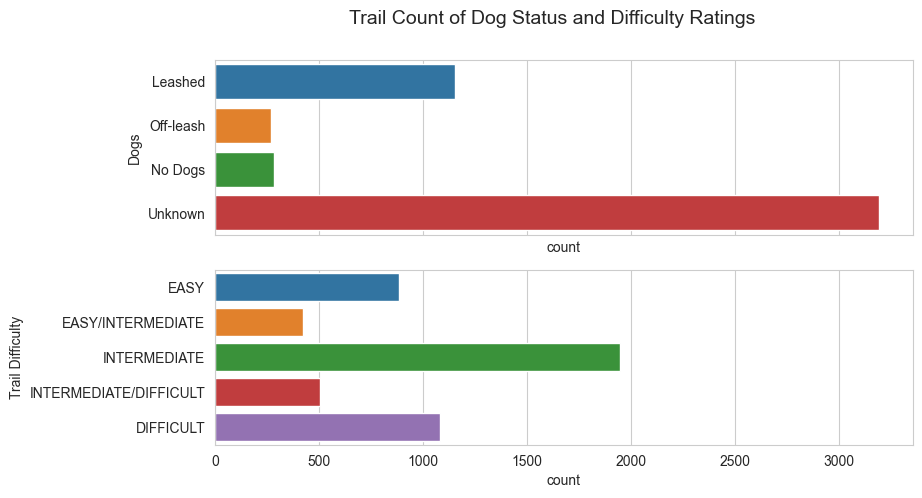

In [6]:
# Plot count data of Dogs and Trail Difficulty on Bar Graphs
plt.rcParams["figure.figsize"] = [9, 5]
sns.set_style("whitegrid")
fig, axs = plt.subplots(nrows=2,sharex=True)
sns.countplot(y=df['Dogs'],order=['Leashed', 'Off-leash', 'No Dogs', 'Unknown'],ax=axs[0])
sns.countplot(y=df['Trail Difficulty'],
               order=['EASY', 'EASY/INTERMEDIATE', 'INTERMEDIATE',
                      'INTERMEDIATE/DIFFICULT', 'DIFFICULT'],ax=axs[1])
fig.suptitle('Trail Count of Dog Status and Difficulty Ratings', fontsize=14)

plt.show()

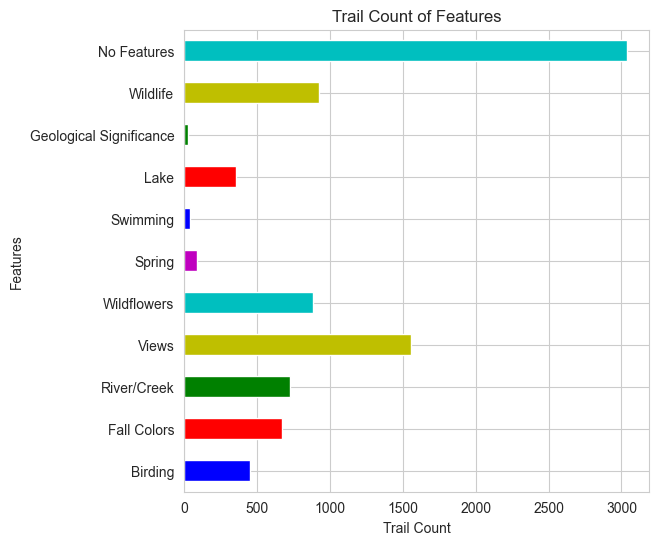

In [7]:
features = df[['Birding', 'Fall Colors', 'River/Creek', 'Views', 'Wildflowers',
               'Spring', 'Swimming', 'Lake', 'Geological Significance', 'Wildlife',
               'No Features']].apply(pd.value_counts)

# Plot count data of Features on Bar Graphs
plt.rcParams["figure.figsize"] = [6, 6]
fig , ax = plt.subplots()
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'c', 'm']), None, len(df)))
ax = features.loc[True].plot.barh(color=my_colors)
plt.xlabel('Trail Count')
plt.ylabel('Features')
plt.title('Trail Count of Features')
plt.show()

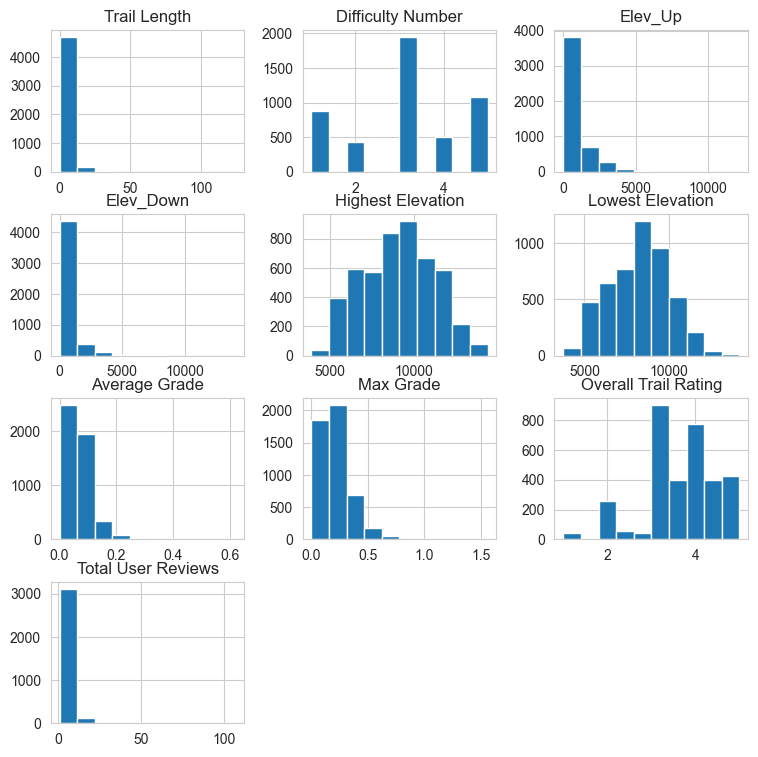

In [8]:
# Plot count data of numeric columns on Histograms
plt.rcParams["figure.figsize"] = [9, 9]
df.select_dtypes(include=['float64']).hist();

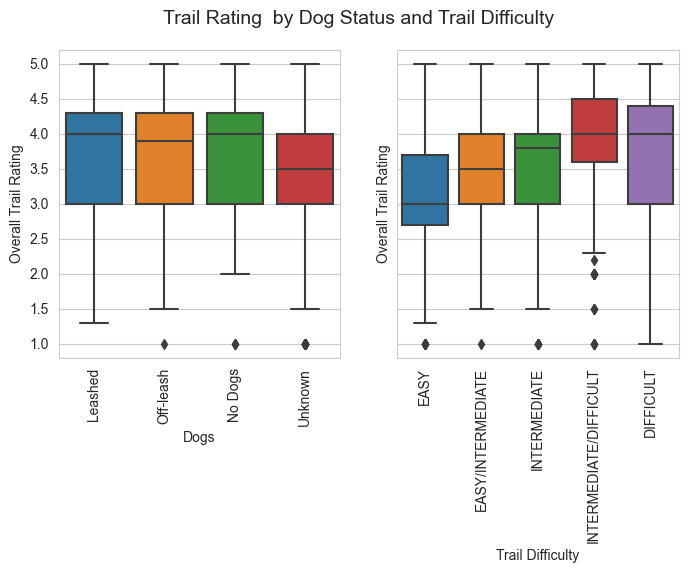

In [14]:
# Plot Box Plot for Trail Rating vs. Trail Difficulty and Dog Status
plt.rcParams["figure.figsize"] = [8, 4]
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=2, sharey=True)
g = sns.boxplot(data=df, x='Trail Difficulty', y='Overall Trail Rating',order=['EASY', 'EASY/INTERMEDIATE', 'INTERMEDIATE',
                      'INTERMEDIATE/DIFFICULT', 'DIFFICULT'], ax=axs[1])
g1 = sns.boxplot(data=df, x='Dogs', y='Overall Trail Rating', order=['Leashed', 'Off-leash', 'No Dogs', 'Unknown'],ax=axs[0])
g.tick_params(axis='x', rotation=90)
g1.tick_params(axis='x', rotation=90)
fig.suptitle('Trail Rating  by Dog Status and Trail Difficulty', y=0.98,fontsize=14)
plt.show()

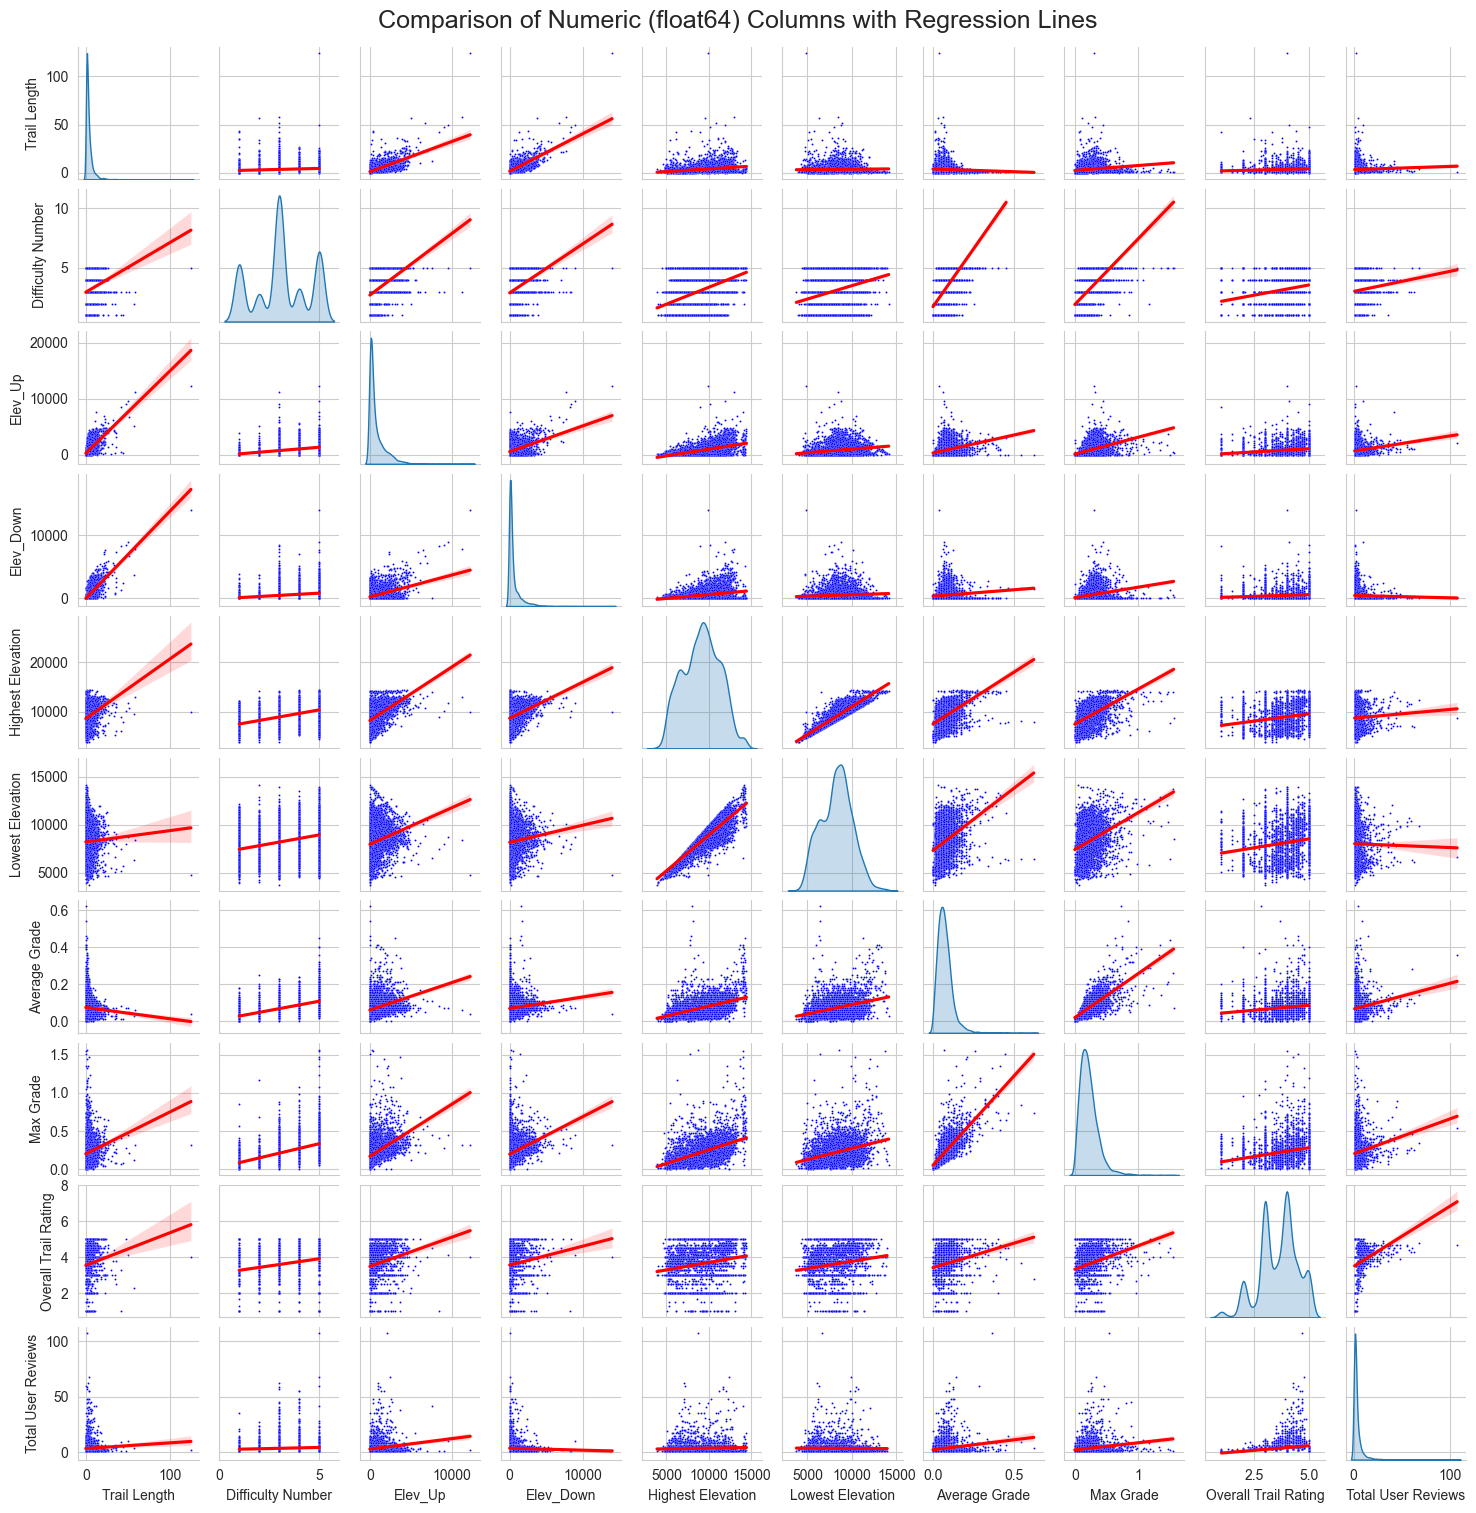

In [15]:
# Make a paired plot of float64/numeric columns to explore relationships and include histograms
sns.set_style("whitegrid")
g = sns.pairplot(df.select_dtypes(include=['float64']),diag_kind="kde",
                 plot_kws={'s':2,'color':'blue'},height = 1.5);
g.map_offdiag(sns.regplot,line_kws={'color':'red'},scatter= False)
g.fig.suptitle('Comparison of Numeric (float64) Columns with Regression Lines',y=1.01,fontsize=18)
plt.show()

## Analysis in R

In [1]:
%load_ext rpy2.ipython 
# Required to run R in the notebook

Load required libraries.

In [2]:
%%R 
library(dplyr)
library(tidyr)
library(stringr)
library(leaps)
library(tidyverse)
library(reticulate)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ forcats 0.5.2
✔ readr   2.1.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

In [3]:
%%R
pd <-import("pandas")
pickle_data <- pd$read_pickle("hike_project_cleaned.pkl")

Some required cleaning for the data to be efficiently analyzed in R. Simplifies names and sets the NaN values to zero.

In [4]:
%%R

pickle.minus <- select(pickle_data, -c("Area", 'City', 'State', 'Site'))
pickle.minus['Total User Reviews'][is.na(pickle.minus['Total User Reviews'])] <- 0
pickle.minus$UserReview <- as.numeric(pickle.minus$'Total User Reviews')
pickle.minus['Overall Trail Rating'][is.na(pickle.minus['Overall Trail Rating'])] <- 0
pickle.minus$TrailRating <- as.numeric(pickle.minus$'Overall Trail Rating')
pickle.minus$Elev_High <- pickle.minus$'Highest Elevation'
pickle.minus$Low_High <- pickle.minus$'Lowest Elevation'
pickle.minus$GradeAvg <- pickle.minus$'Average Grade'
pickle.minus$GradeMax <- pickle.minus$'Max Grade'
pickle.minus$TrailLength <- pickle.minus$'Trail Length'

Turns categorical variables into factors.

In [5]:
%%R

pickle.minus['Dogs'][is.na(pickle.minus['Dogs'])] <- 'Unknown'
pickle.minus$Dogs <- str_split_fixed(pickle.minus$Dogs, ' ', 2)
pickle.minus$Dogs_Factor <- as.factor(pickle.minus$Dogs[,1])

In [9]:
%%R

pickle.minus$Difficulty_Factor <- as.factor(pickle.minus$'Trail Difficulty')
pickle.minus$TrailType_Factor <- as.factor(pickle.minus$'Trail Type')
pickle.minus$FallColor_Factor <- as.factor(pickle.minus$'Fall Color')
pickle.minus$River_Factor <- as.factor(pickle.minus$River)
pickle.minus$Views_Factor <- as.factor(pickle.minus$Views)
pickle.minus$Wildlife_Factor <- as.factor(pickle.minus$Wildlife)
pickle.minus$Wildflowers_Factor <- as.factor(pickle.minus$Wildflower)
pickle.minus$Birding_Factor <- as.factor(pickle.minus$Birding)
pickle.minus$Lake_Factor <- as.factor(pickle.minus$Lake)
pickle.minus$GeoSig_Factor <- as.factor(pickle.minus$'Geological Significance')

In [10]:
%%R

summary(pickle.minus)

  Trail Name         Trail Length     Trail Difficulty   Difficulty Number
 Length:4903        Min.   :  0.000   Length:4903        Min.   :1.000    
 Class :character   1st Qu.:  1.000   Class :character   1st Qu.:2.000    
 Mode  :character   Median :  2.100   Mode  :character   Median :3.000    
                    Mean   :  3.505                      Mean   :3.099    
                    3rd Qu.:  4.300                      3rd Qu.:4.000    
                    Max.   :124.500                      Max.   :5.000    
                                                         NA's   :59       
  Trail Type           Elev_Up          Elev_Down     Highest Elevation
 Length:4903        Min.   :    0.0   Min.   :    0   Min.   : 3886    
 Class :character   1st Qu.:   85.0   1st Qu.:   22   1st Qu.: 7436    
 Mode  :character   Median :  329.0   Median :  150   Median : 9166    
                    Mean   :  758.1   Mean   :  503   Mean   : 9088    
                    3rd Qu.: 1062.0   3r

Creates a new dataframe with only the columns that will be analyzed. Removes trails without a user rating.

In [11]:
%%R

trail <- select(pickle.minus, -c('Fall Colors', 'River/Creek', 'Views', 'Wildlife', 'Wildflowers', 'Birding', 'Lake', 'Geological Significance', 'Highest Elevation', 'Lowest Elevation', 'Average Grade', 'Max Grade', 'Trail Length'))
trail.no.user <- trail[trail$UserReview=="0",]
trail.minus <- trail[!trail$UserReview=="0",]
nrow(trail.no.user)

[1] 1596


We determine if any factors contribute to the rating in a statistically significant way, p < .05.  

In [ ]:
%%R

model.one <- lm(TrailRating ~ TrailType_Factor + Difficulty_Factor + Elev_Up + Elev_Down + GradeAvg + GradeMax + TrailLength + UserReview + Dogs_Factor + FallColor_Factor + River_Factor + Views_Factor + Wildlife_Factor + Wildflowers_Factor + Birding_Factor + Lake_Factor + GeoSig_Factor, data=trail.minus)
summary(model.one)

Using best subset regression with all the factors.

In [ ]:
%%R
fmla <-as.formula("TrailRating ~ TrailType_Factor + Difficulty_Factor + Elev_Up + Elev_Down + GradeAvg + GradeMax + TrailLength + UserReview + Dogs_Factor + FallColor_Factor + River_Factor + Views_Factor + Wildlife_Factor + Wildflowers_Factor + Birding_Factor + Lake_Factor + GeoSig_Factor + UserReview")
x<-model.matrix(fmla, data=trail.minus)
y<-trail.minus$TrailRating
best<-regsubsets(x=x[,2:ncol(x)], y=y, method="exhaustive", nvmax=50, nbest=1)
summary(best)


Determine which coefficents belong to the model with the lowest BIC.

In [ ]:
%%R
best.subset.bic<-which(summary(best)$bic==min(summary(best)$bic))[1]
best.subset.bic
coef(best, best.subset.bic)

Not all the trails have features. Removing the features from the model formula.

In [ ]:
%%R
fmla.nf <-as.formula("TrailRating ~ TrailType_Factor + Difficulty_Factor + Elev_Up + Elev_Down + GradeAvg + GradeMax + TrailLength")
x<-model.matrix(fmla.nf, data=trail.minus)
y<-trail.minus$TrailRating
best.nf <-regsubsets(x=x[,2:ncol(x)], y=y, method="exhaustive", nvmax=30, nbest=1)
summary(best.nf)

Determine which coefficients belong to the model with the lowest BIC.

In [ ]:
%%R

best.nf.subset.bic<-which(summary(best.nf)$bic==min(summary(best.nf)$bic))[1]
best.coef <- coef(best.nf, best.nf.subset.bic)
best.coef